<a href="https://colab.research.google.com/github/IvanovMaxim2000/Homework_AI/blob/main/ML_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 5
## Постановка задачи:


1.   Реализовать 3 генератора(для равномерного распределения, нормального и два пика)
2.   Реализовать метод Парзена-Розенблата
3. Восстановить с помощью метода Парзена-Розенблата плотности в виде картинок
4. с помощью метода скользящего контроля(LOO) подобрать оптимальную ширину окна
5. Применить EM алгоритм из sklearn



In [4]:
import random
import math
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from typing import Mapping
import matplotlib.pyplot as plt

## Реализация генератора данных для равномерного распределения

$p(x) = \frac{1}{(b-a)}$

In [22]:
def uniform_generator():
  left_boarder, right_boarder = 0,1
  return random.random() * (right_boarder - left_boarder) + left_boarder

### Функция для создания списка равномерно распределенных случайных чисел

In [9]:
def uniform_generator_list(size):
  i = 0
  listik = []
  while (i != size):
    listik.append(uniform_generator())
    i += 1
  return listik


### Функция отрисовки гистограммы


In [18]:
def draw_uniform_hist(listik, distribution_name):
  plt.title(distribution_name)
  plt.hist(listik, bins=len(listik))
  plt.show()

### Функция отрисовки точек на плоскости


In [105]:
def draw_uniform_point(listik, distribution_name):
  sizes = [i for i in range(len(listik))]
  plt.title(distribution_name)
  plt.scatter(listik,sizes)
  plt.show()

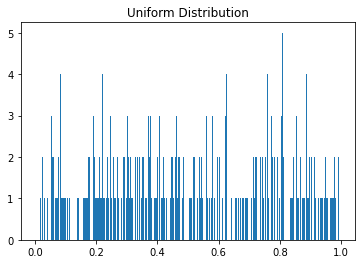

In [23]:
draw_uniform_hist(uniform_generator_list(1000), "Uniform Distribution")

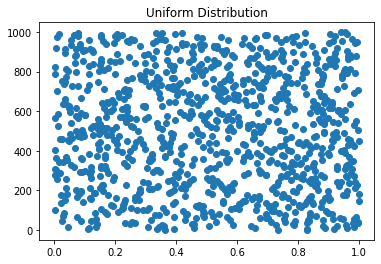

In [106]:
draw_uniform_point(uniform_generator_list(1000), "Uniform Distribution")

## Гауссовское(нормальное) распределение

$f(x) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$


Параметр mu — среднее или математическое ожидание распределения (а также его медиана и мода ), а параметр sigma является его стандартным отклонением . Дисперсия распределения _$sigma^2$. Случайная величина с гауссовым распределением называется нормально распределенной и называется нормальным отклонением .

In [42]:
def Gauss_generator(mu, sigma):
    res = 0
    x2pi = np.random.random() * 2 * np.pi
    g2rad = np.sqrt(-2.0 * np.log(1.0 - np.random.random()))
    z = np.cos(x2pi) * g2rad
    res = mu + z *sigma
    return res

In [55]:
def Gauss_list(size, mu, sigma):
  res = []
  for i in range(size):
      res.append(Gauss_generator(mu, sigma))
  return res

## Функции отрисовки

Возьмём частный случай, когда mu = 0 и sigma = 0.1

In [80]:
def draw_Gauss_hist(listik, distribution_name):
  count, bins, ignored = plt.hist(listik, 30, density=True)
  plt.title(distribution_name)
  plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
  plt.show()

In [107]:
def draw_Gauss_point(listik, distribution_name):
  plt.title(distribution_name)
  sizes = [i for i in range(len(listik))]
  plt.scatter(listik,sizes)
  plt.show()

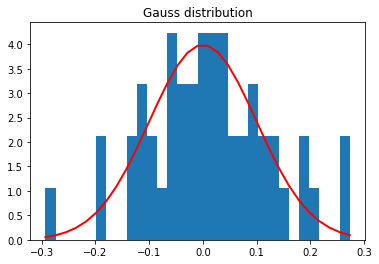

In [101]:
mu, sigma = 0, 0.1
listik = Gauss_list(50, mu, sigma)
draw_Gauss_hist(listik, "Gauss distribution")

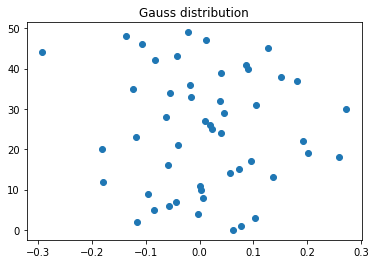

In [108]:
draw_Gauss_point(listik, "Gauss distribution")

## Два пика

In [110]:
def two_peaks_list(size, mu1, sigma1, mu2, sigma2):
  res = []
  first_peak = Gauss_list(size, mu1, sigma1)
  second_peak = Gauss_list(size, mu2, sigma2) 
  for i in range(size):
    res.append(first_peak[i])
  for i in range(size):
    res.append(second_peak[i])

  return res

In [115]:
def draw_peaks_hist(listik, distribution_name):
  count, bins, ignored = plt.hist(listik, 30, density=True)
  plt.title(distribution_name)
  plt.show()

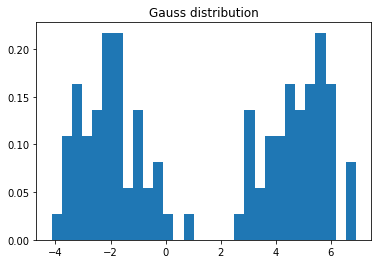

In [116]:
mu1, sigma1, mu2, sigma2 = -2, -1, 5, 1 
listik = two_peaks_list(50, mu1, sigma2, mu2, sigma2)
draw_peaks_hist(listik, "Gauss distribution")

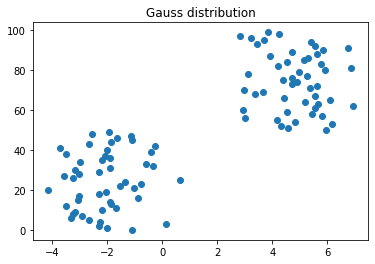

In [117]:
draw_Gauss_point(listik, "Gauss distribution")

## Реализация алгоритма Парзена Розенблатта

Источник: https://studme.org/139986/informatika/algoritm_parzena_rozenblatta

In [224]:
def Gauss_kernel(r):
  return ((1/(4 * np.pi **2)) * np.exp(-(r ** 2/2)))

In [227]:
def gauss_kernel_2(r):
  return np.sqrt(1 / 2 * np.pi) * np.exp(r**2 * (-0.5))

In [225]:
# h - ширина окна
def estimation(x, date_list, h):
  res = 0
  for i in range(len(date_list)):
    res += Gauss_kernel((x - date_list[i])/h)
  return res * (1/(len(date_list) * h))

## Восстановлений плотности распределения тестовых данных

In [193]:
def draw_parzen_res(date_list, title, h = 1):

    left_boarder = np.min(date_list)
    right_boarder = np.max(date_list)
    x = np.linspace(left_boarder, right_boarder, len(date_list))
    parzen_estimation = estimation(x, listik, h)
    fig, sp = plt.subplots(figsize=(20,8))
    plt.title(title)
    sp.plot(x, parzen_estimation)
    sp.scatter(listik,np.zeros(len(listik)), marker = "|")
    sp.set_xlim((left_boarder, right_boarder))
    plt.show()

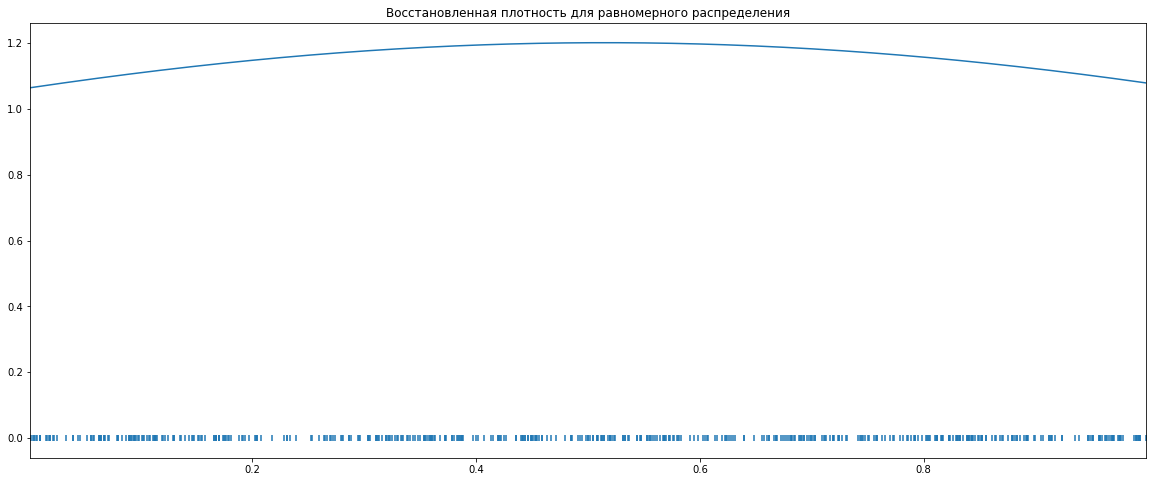

In [195]:
listik = uniform_generator_list(500)
draw_parzen_res(listik, "Восстановленная плотность для равномерного распределения")

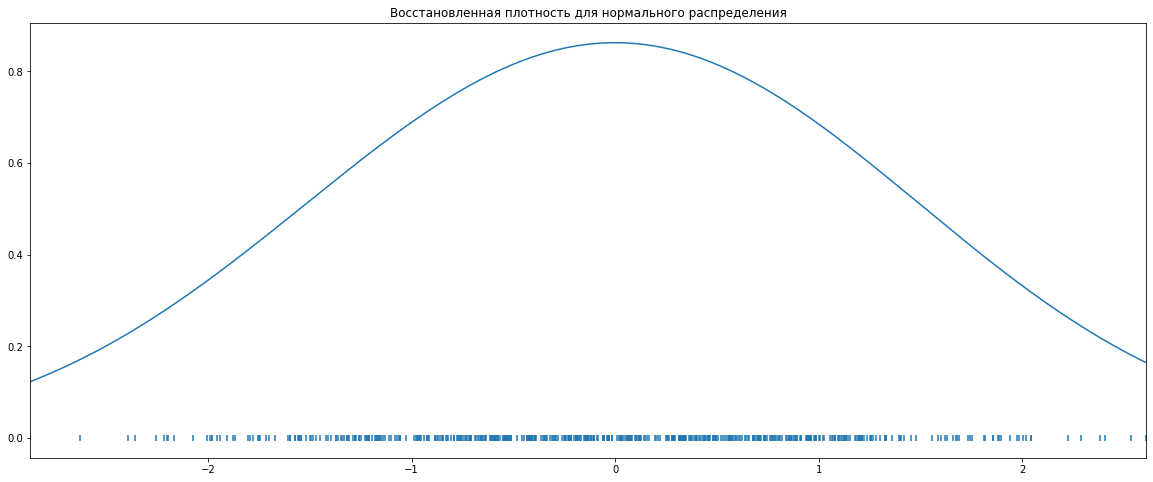

In [194]:
listik = Gauss_list(500, 0, 1)
draw_parzen_res(listik, "Восстановленная плотность для нормального распределения")

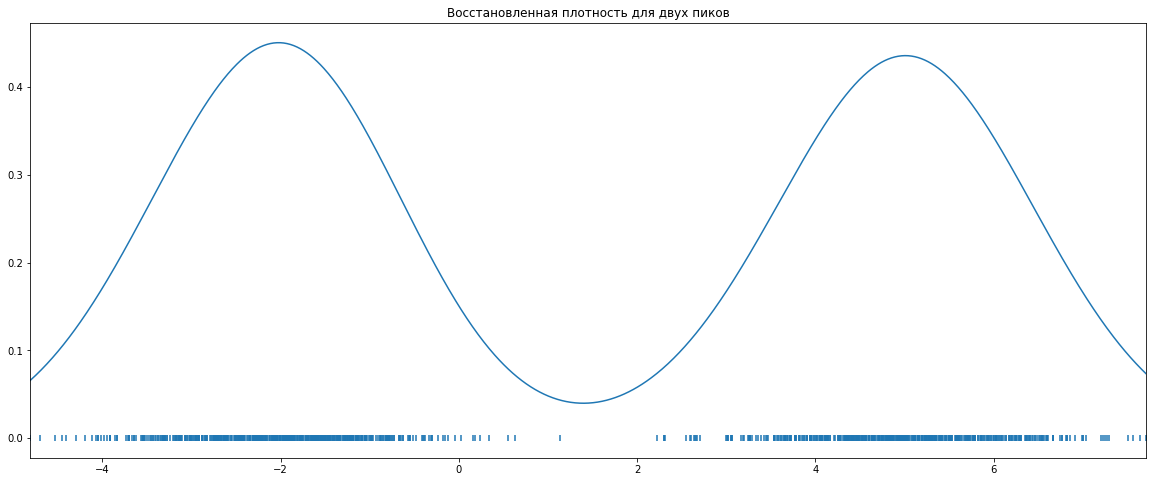

In [196]:
listik = two_peaks_list(500, mu1, sigma1, mu2, sigma2)
draw_parzen_res(listik, "Восстановленная плотность для двух пиков")

## LOO - метод скользящего контроля

LOO(leave one out) - метод, применяемый для подбора оптимальных параметров. 
Суть метода заключается в том, что мы поочередно для каждого объекта выборки без него проводим обучение модели и пытаемся предсказать значение класса для этого исключенного объекта. Выбирая диапазон изменения настраиваемого параметра (в нашем случае — размер окна(h)), мы подбираем такое его значение, при котором минимизируется выражение.

In [211]:
def LOO(x, date_list, h):
  res = 0
  for i in range(len(date_list)):
    res -= np.log(estimation(x,date_list, h))
  return res

In [217]:
date_list = uniform_generator_list(500)
left_boarder = np.min(date_list)
right_boarder = np.max(date_list)
x = np.array([0])
listik = np.vstack(np.array(date_list))
loo = LOO(x, date_list, 5)
print(f"Вычесленное с помощью значение для ширины окна = {loo}")

Вычесленное с помощью значение для ширины окна = [695.16396438]


## EM алгоритм для двух пиков

Источник: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

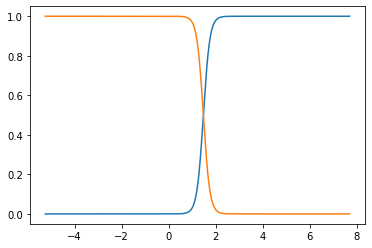

In [223]:
from sklearn.mixture import GaussianMixture

date_list = two_peaks_list(500, mu1, sigma1, mu2, sigma2)
left_boarder = np.min(date_list)
right_boarder = np.max(date_list)
x = np.linspace(left_boarder, right_boarder, len(date_list))
f = np.array(date_list).reshape(-1,1)
gaussian_mix = GaussianMixture(2, random_state=0).fit(f)

plt.plot(x, gaussian_mix.predict_proba(np.array(x).reshape(-1,1))[:,0], x, gaussian_mix.predict_proba(np.array(x).reshape(-1,1))[:,1])
plt.show()